In [338]:
import numpy as np
from matplotlib import pyplot as plt

In [339]:
px2m = 1040 / np.sqrt((1073 - 1087)**2 + (848 - 1307)**2)/1e3
fps = 25

In [340]:
m, m2 = 0.14320454210070993, 0.12652597975573926

In [341]:
x = np.linspace(-1080, 920, 200)*px2m
y = np.linspace(-850, 250, 110)*px2m
xx, yy = np.meshgrid(x, y)

In [342]:
x1, y1 = -240*px2m, 0
x2, y2 = 240*px2m, 0

In [343]:
u = np.zeros_like(xx)
v = np.zeros_like(xx)

In [344]:
u1 = m * (xx - x1) / ((xx - x1)**2 + (yy - y1)**2) + \
    m * (xx - x2) / ((xx - x2)**2 + (yy - y2)**2)
v1 = m * (yy - y1) / ((xx - x1)**2 + (yy - y1)**2) + \
    m * (yy - y2) / ((xx - x2)**2 + (yy - y2)**2)
u15 = m2 * (xx - x1) / ((xx - x1)**2 + (yy - y1)**2)**1.5 + \
    m2 * (xx - x2) / ((xx - x2)**2 + (yy - y2)**2)**1.5
v15 = m2 * (yy - y1) / ((xx - x1)**2 + (yy - y1)**2)**1.5 + \
    m2 * (yy - y2) / ((xx - x2)**2 + (yy - y2)**2)**1.5
u2 = m2 * (xx - x1) / ((xx - x1)**2 + (yy - y1)**2)**2 + \
    m2 * (xx - x2) / ((xx - x2)**2 + (yy - y2)**2)**2
v2 = m2 * (yy - y1) / ((xx - x1)**2 + (yy - y1)**2)**2 + \
    m2 * (yy - y2) / ((xx - x2)**2 + (yy - y2)**2)**2

In [345]:
for j in range(xx.shape[0]):
    for i in range(xx.shape[1]):
        if np.sqrt((xx[j, i] - 240*px2m)**2 + yy[j, i]**2) < 0.4 or np.sqrt((xx[j, i] + 240*px2m)**2 + yy[j, i]**2) < 0.4:
            u[j, i] = np.nan
            v[j, i] = np.nan

        elif 0.4 <= np.sqrt((xx[j, i] - 240*px2m)**2 + yy[j, i]**2) < 0.8 or 0.4 <= np.sqrt((xx[j, i] + 240*px2m)**2 + yy[j, i]**2) < 0.8:
            u[j, i] = u1[j, i]
            v[j, i] = v1[j, i]

        elif 0.8 <= np.sqrt((xx[j, i] - 240*px2m)**2 + yy[j, i]**2) < 1.2 or 0.8 <= np.sqrt((xx[j, i] + 240*px2m)**2 + yy[j, i]**2) < 1.2:
            u[j, i] = u15[j, i]
            v[j, i] = v15[j, i]

        elif 1.2 <= np.sqrt((xx[j, i] - 240*px2m)**2 + yy[j, i]**2) or 1.2 <= np.sqrt((xx[j, i] + 240*px2m)**2 + yy[j, i]**2):
            u[j, i] = u2[j, i]
            v[j, i] = v2[j, i]

C:\Users\wada\anaconda3\envs\cbi_venv\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys


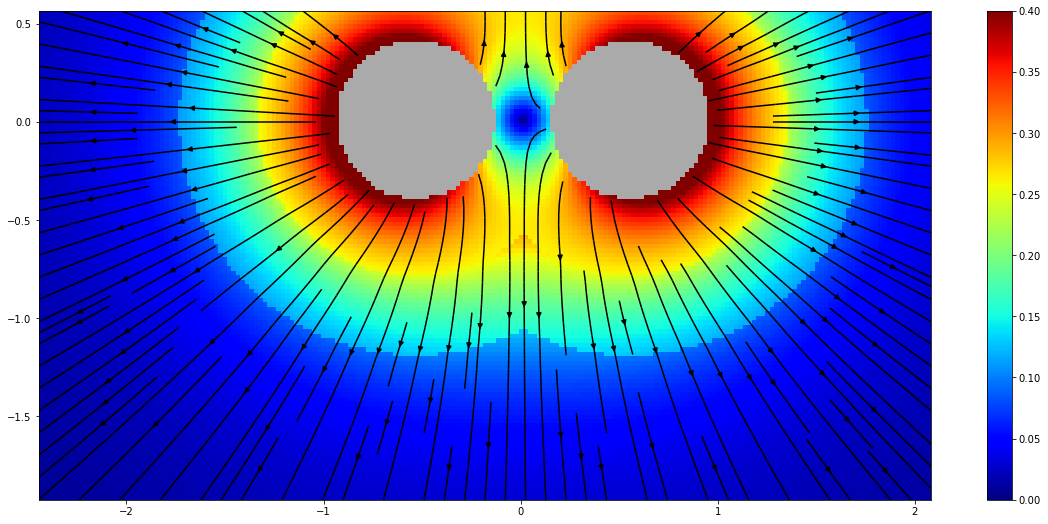

In [346]:
fig, ax = plt.subplots(figsize=(20, 9))
ax.set_facecolor('#aaa')
plt.xlim(-1080*px2m, 920*px2m)
plt.ylim(-850*px2m, 250*px2m)

plt.streamplot(xx, yy, u, v, color='k', density=1.5)
plt.pcolormesh(xx, yy, np.sqrt(u**2 + v**2), cmap='jet', alpha=1)

plt.colorbar()
plt.clim(0, 0.4)
plt.show()
fig.savefig('twin11_rn.png')

C:\Users\wada\anaconda3\envs\cbi_venv\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys


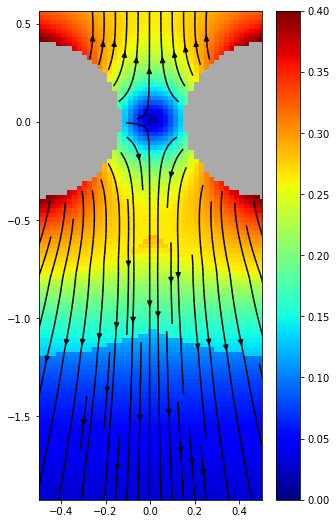

In [347]:
fig, ax = plt.subplots(figsize=(5, 9))
ax.set_facecolor('#aaa')
plt.xlim(-0.5, 0.5)
plt.ylim(-850*px2m, 250*px2m)

plt.streamplot(xx, yy, u, v, color='k', density=3)
plt.pcolormesh(xx, yy, np.sqrt(u**2 + v**2), cmap="jet")

plt.colorbar()
plt.clim(0, 0.4)
plt.show()

fig.savefig('twin1_rn.png')

In [348]:
a, b = 0.6435914139761832, -1.6478683559414669

In [349]:
u = a * np.exp(b * np.sqrt((xx - x1)**2 + (yy - y1)**2)) * (xx - x1) / np.sqrt((xx - x1)**2 + (yy - y1)**2)
v = a * np.exp(b * np.sqrt((xx - x1)**2 + (yy - y1)**2)) * (yy - y1) / np.sqrt((xx - x1)**2 + (yy - y1)**2)

u += a * np.exp(b * np.sqrt((xx - x2)**2 + (yy - y2)**2)) * (xx - x2) / np.sqrt((xx - x2)**2 + (yy - y2)**2)
v += a * np.exp(b * np.sqrt((xx - x2)**2 + (yy - y2)**2)) * (yy - y2) / np.sqrt((xx - x2)**2 + (yy - y2)**2)

In [350]:
for j in range(xx.shape[0]):
    for i in range(xx.shape[1]):
        if np.sqrt((xx[j, i] - 240*px2m)**2 + yy[j, i]**2) < 0.4 or np.sqrt((xx[j, i] + 240*px2m)**2 + yy[j, i]**2) < 0.4:
            u[j, i] = np.nan
            v[j, i] = np.nan

C:\Users\wada\anaconda3\envs\cbi_venv\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys


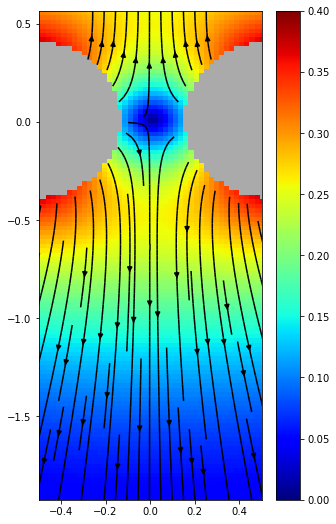

In [351]:
fig, ax = plt.subplots(figsize=(5, 9))
ax.set_facecolor('#aaa')
plt.xlim(-0.5, 0.5)
plt.ylim(-850*px2m, 250*px2m)

plt.streamplot(xx, yy, u, v, color='k', density=3)
plt.pcolormesh(xx, yy, np.sqrt(u**2 + v**2), cmap="jet")

plt.colorbar()
plt.clim(0, 0.4)
plt.show()

fig.savefig('twin1_exp.png')

C:\Users\wada\anaconda3\envs\cbi_venv\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys


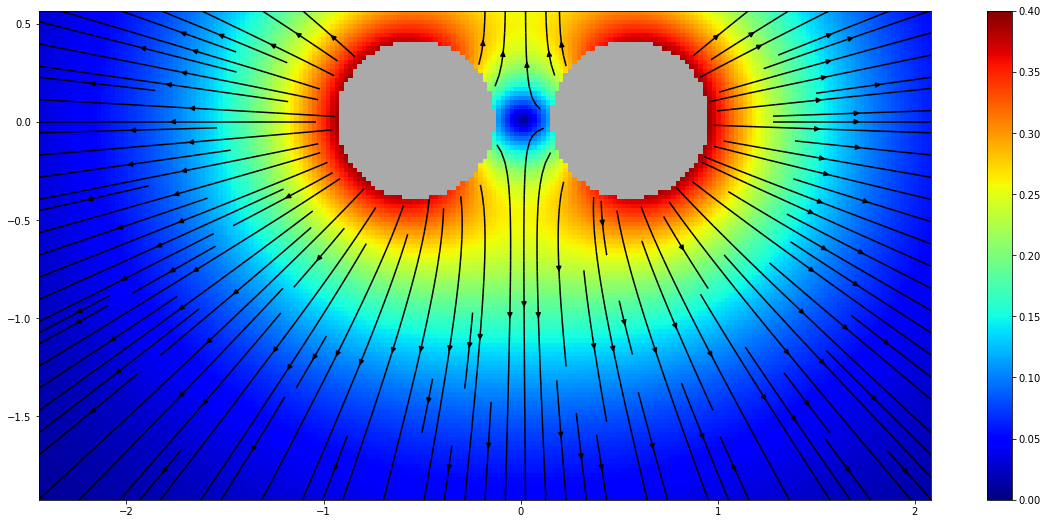

In [352]:
fig, ax = plt.subplots(figsize=(20, 9))
ax.set_facecolor('#aaa')
plt.xlim(-1080*px2m, 920*px2m)
plt.ylim(-850*px2m, 250*px2m)

plt.streamplot(xx, yy, u, v, color='k', density=1.5)
plt.pcolormesh(xx, yy, np.sqrt(u**2 + v**2), cmap='jet', alpha=1)

plt.colorbar()
plt.clim(0, 0.4)
plt.show()
fig.savefig('twin11_exp.png')